In [2]:
%load_ext autoreload
%autoreload 2
    
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_quittime import RPS_quittime  
from rps_simulation.learning_curves import exponential_learning, logistic_learning # learonning curves
from rps_simulation.forgetting_curves import exponential_forgetting  # forgetting curves
from rps_simulation.practice_rate import simple_linear_rate  # simple linear rate
from rps_simulation.waiting_times import exponential_waiting_time  # exp waiting time distributi


import numpy as np
import matplotlib.pyplot as plt

# Colour codes for concave and sigmoid curves:
concave_colour = '#466be8'
sigmoid_colour = '#f77150'

plot_dpi = 300 #dpi at which plots will be saved


np.random.seed(10) #setting seed for reproducible results 


In [6]:

## Defining the learning, forgetting and practice functions:
exp_learning = exponential_learning(alpha=0.4) # alpha is the learning rate
simple_prac_func = simple_linear_rate(a=0.2, b=5) # sample practice function
exp_forgetting = exponential_forgetting(forgetting_rate=0.2) # setting forgetting function to exponential 

# Initializing the RPS_core class:
sample_concave = RPS_quittime(learning_func = exponential_learning(alpha=0.2),
                    forgetting_func = exponential_forgetting(forgetting_rate=0.2),
                    practice_rate_func = simple_linear_rate(a=0.05, b=5),
                    waiting_time_dist = exponential_waiting_time,
                    initial_skill=0.1, initial_practice_rate=1, 
                    quit_thresh=20, max_time=1000)


# run simulation:
sample_concave.run_simulation()


# simple learning trajectory with markers for practice events:
# sample_concave.plot_combined_trajectory(save_location='../plots/sample_simple_traj.jpg', save_dpi=plot_dpi)

# Can also plot smooth trajectory:
# sample_concave.plot_learning_trajectory(least_count=0.25, min_points=5, save_location='../plots/sample_smooth_traj.jpg')

# Can also generate timestamp plots of when practice_events occured:
# sample_concave.practice_times_plot()


# Get data form the simulation run and collect it in a dictionary
# sample_data = sample_concave.data()


In [10]:
ps = sample_concave.practice_times
ss = sample_concave.skill_levels


In [11]:
sample_concave.quit

0

## Loop and run many sims 

Formula to set suitable $T_{th}$ quit threshold:\
$$ T_{th} = \frac{\ln(N)}{\beta} $$
where, 
* $N$ = factor by which skill diminishes at quit vs. at last practice event
* $T_{th}$ = quit threshold to set in sim
* $\beta$ = forgetting rate
### 1. Exponential Case:

In [12]:
beta = 0.2;  N_factor = 100
np.log(N_factor)/beta

23.025850929940457

In [41]:
n_sims = 1000

quit_exp = [] # binary list storing if quit or not
n_prac_exp = [] # number of pracytice events
s_final_exp = [] # final skill
prac_final_exp = []
for i in range(n_sims):
    tmp_sim = RPS_quittime(learning_func = exponential_learning(alpha=0.2),
                    forgetting_func = exponential_forgetting(forgetting_rate=0.2),
                    practice_rate_func = simple_linear_rate(a=0.2, b=5),
                    waiting_time_dist = exponential_waiting_time,
                    initial_skill=0.1, initial_practice_rate=1, 
                    quit_thresh=20, max_time=500)

    tmp_sim.run_simulation()
    quit_tmp = tmp_sim.quit # quit?
    quit_exp.append(quit_tmp)
    
    n_prac_exp.append(len(tmp_sim.practice_times)-2)
    s_final_exp.append(tmp_sim.final_skill)    
    prac_final_exp.append(tmp_sim.practice_times[-2])

exp_quit = {'quit': quit_exp,
            'n_prac': n_prac_exp,
            's_final': s_final_exp,
            'prac_final': prac_final_exp
           } 

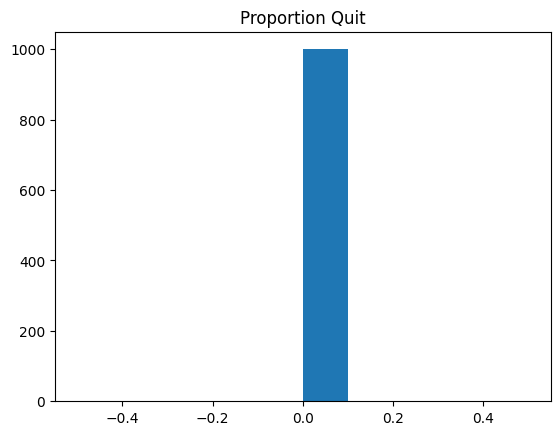

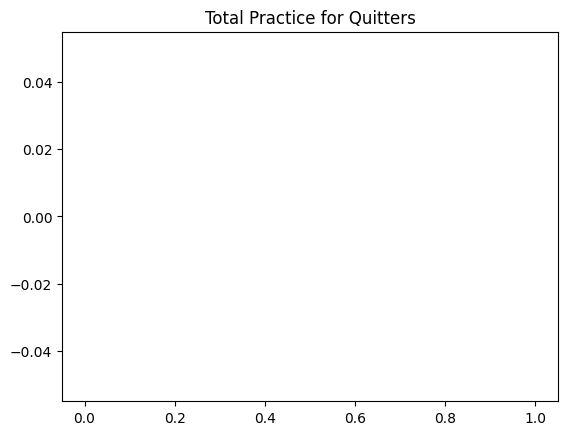

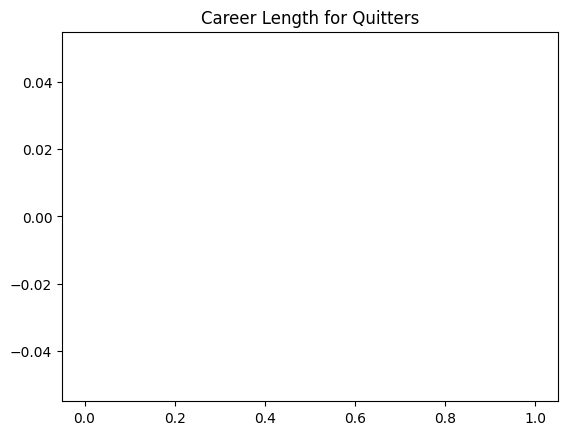

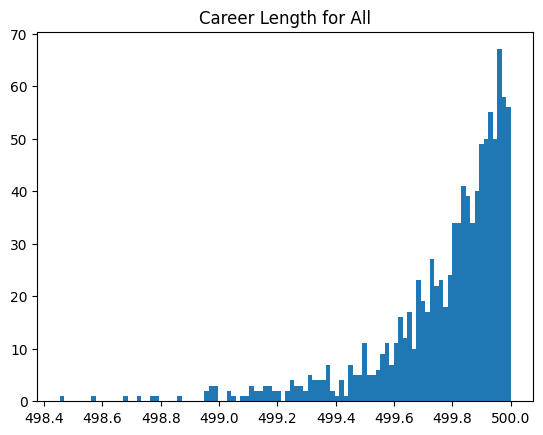

In [24]:
plt.hist(quit_exp)
plt.title('Proportion Quit')
plt.show()



plt.hist([n_prac_exp[i] for i in range(n_sims) if quit_exp[i]==1], bins=100)
plt.title('Total Practice for Quitters')
plt.show()



plt.hist([prac_final_exp[i] for i in range(n_sims) if quit_exp[i]==1], bins=100)
plt.title('Career Length for Quitters')
plt.show()

plt.hist(prac_final_exp, bins=100)
plt.title('Career Length for All')
plt.show()



### 2. Sigmoid Law

In [42]:
n_sims = 1000

quit_log = [] # binary list storing if quit or not
n_prac_log = [] # number of pracytice events
s_final_log = [] # final skill
prac_final_log = []
for i in range(n_sims):
    tmp_sim = RPS_quittime(learning_func = logistic_learning(alpha=0.2),
                    forgetting_func = exponential_forgetting(forgetting_rate=0.2),
                    practice_rate_func = simple_linear_rate(a=0.2, b=5),
                    waiting_time_dist = exponential_waiting_time,
                    initial_skill=0.1, initial_practice_rate=1, 
                    quit_thresh=20, max_time=500)

    tmp_sim.run_simulation()
    quit_tmp = tmp_sim.quit # quit?
    quit_log.append(quit_tmp)
    
    n_prac_log.append(len(tmp_sim.practice_times)-2)
    s_final_log.append(tmp_sim.final_skill)    
    prac_final_log.append(tmp_sim.practice_times[-2])

# Make dict for saving:
log_quit = {'quit': quit_log,
            'n_prac': n_prac_log,
            's_final': s_final_log,
            'prac_final': prac_final_log
            }


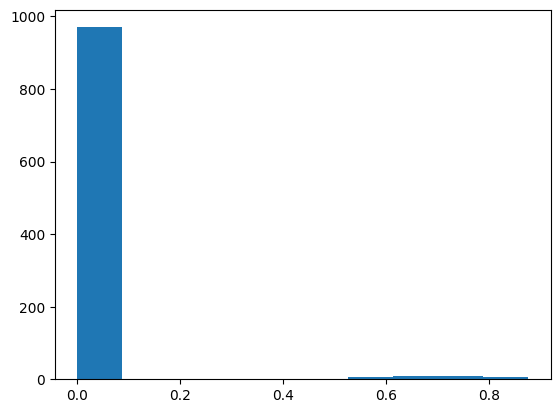

In [43]:
plt.hist(s_final_log)
plt.show()

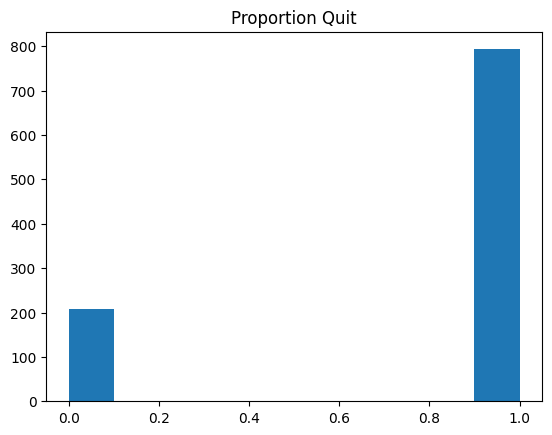

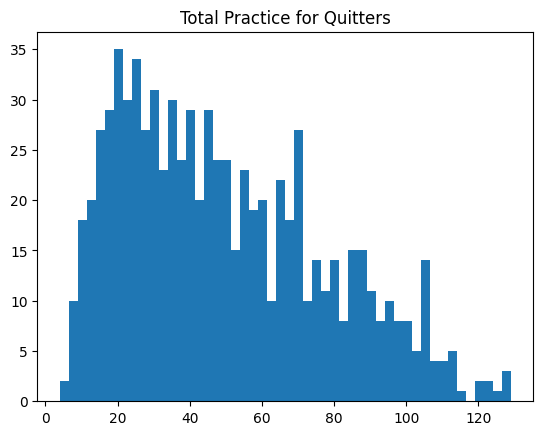

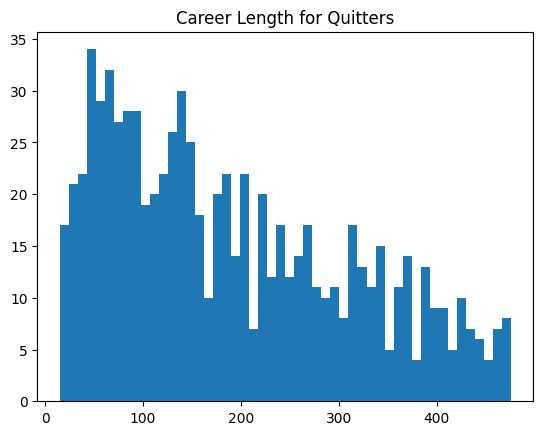

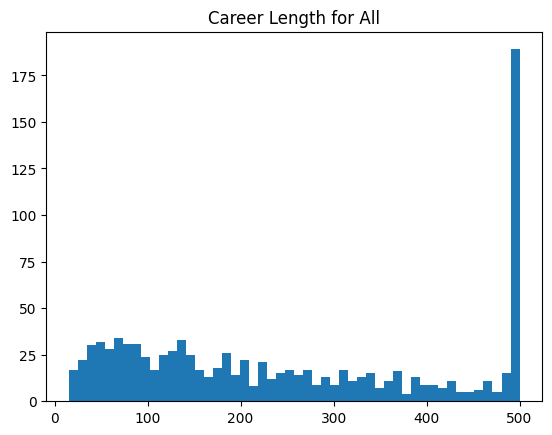

In [44]:
plt.hist(quit_log)
plt.title('Proportion Quit')
plt.show()



plt.hist([n_prac_log[i] for i in range(n_sims) if quit_log[i]==1], bins=50)
plt.title('Total Practice for Quitters')
plt.show()



plt.hist([prac_final_log[i] for i in range(n_sims) if quit_log[i]==1], bins=50)
plt.title('Career Length for Quitters')
plt.show()

plt.hist(prac_final_log, bins=50)
plt.title('Career Length for All')
plt.show()



## Career Length power law?
